## Region and domain: Washington city, DC, United States. Metro ridership
Research question: how the silver line opening affects ridership of metro stations in DC area.
Speculation: silver line transport between western and eastern DC and it has many transfer stations with other lines. The line would relieve the stress of some transfer stations that are not part of it, like Gallery Place – Chinatown station. At the same time, other transfer stations like Metro Center and L’Enfant Plaza will receive more passengers. 
Links: main entry: https://planitmetro.com/2016/03/24/data-download-metrorail-ridership-by-station-by-month-2010-2015/
https://planitmetro.com/wp-content/uploads/2016/03/Avg-Weekday-Rail-Ridership-by-Month-by-Station-2010-to-20161.xlsx
https://planitmetro.com/wp-content/uploads/2016/03/Avg-Weekday-Rail-Ridership-by-Month-by-Station-by-Period-2010-to-2016.xlsx
Discussion: The visualization is based on the mean of “riders per weekday” for each station and I only choose top 10 busiest metro station for analysis. This visualization has 2 bars, the blue bar showed riders per weekday one year before silver line opens(2013 August – 2014 July) and the orange bar showed riders per weekday one year after silver line opens (2014 August – 2015 July). 
The visualization indicates that, after silver line opens, Union Station, Metro Center, Farragut North, Farragut West, Dupont Circle, McPherson Square and Pentagon stations have fewer passengers than they used to. On the contrary, Gallery Place – Chinatown, Foggy Bottom, and L’Enfant Plaza, receives more visitors than usual. Among these 3, Foggy Bottom and L’Enfant Plaza receives more significant increase in their ridership. 
According to the map, if silver line opens, among these 10 stations, Farragut West, Metro Center, Foggy Bottom, McPherson Square, L’Enfant Plaza should have more visitors than usual because a new line is added. But according to the visualization, only 2 stations had more. The thing in common is they are near Potomac River, which separates DC and Virginia. So silver line added more connection between DC and northern Virginia and, to some extent, relieved some metro pressure in the downtown area.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('Weekday-Rail-Ridership-2010-to-20161.xlsx')
df = df.rename(columns = {'RIDERS_PER_WEEKDAY': 'RPW', 'DATEMONTHINT': 'DATE'})
df_nonsilver = df[(df['DATE'] >= 201308) & (df['DATE'] <= 201407)]
df_silver = df[(df['DATE'] >= 201408) & (df['DATE'] <= 201507)]
df_nonsilver = df_nonsilver.set_index('STATION')
maxRPW_nonsilver = df_nonsilver.groupby(level = 0)['RPW'].mean()
maxRPW_nonsilver = maxRPW_nonsilver.sort_values(ascending = False).head(10)

df_silver = df_silver.set_index('STATION')
maxRPW_silver = df_silver.groupby(level = 0)['RPW'].mean()

maxRPW_silver = maxRPW_silver.sort_values(ascending = False).head(10)
# maxRPW_silver.sort_values(ascending = False)
maxRPW_silver

STATION
Union Station              30471.658333
Metro Center               26472.458333
Gallery Place-Chinatown    25369.500000
Farragut North             23862.450000
Farragut West              21769.783333
Foggy Bottom               21216.133333
Dupont Circle              19941.575000
L'Enfant Plaza             19819.558333
McPherson Square           15403.900000
Pentagon                   14871.958333
Name: RPW, dtype: float64

In [2]:
maxRPW_nonsilver

STATION
Union Station              31326.475000
Metro Center               26630.141667
Gallery Place-Chinatown    25199.483333
Farragut North             24221.558333
Farragut West              22005.016667
Foggy Bottom               20285.208333
Dupont Circle              20203.216667
L'Enfant Plaza             18680.866667
McPherson Square           15533.458333
Pentagon                   15323.158333
Name: RPW, dtype: float64

In [3]:
maxRPW = pd.concat([maxRPW_nonsilver, maxRPW_silver], axis=1)
maxRPW.columns = ['before silver line', 'after silver line']
maxRPW


,before silver line,after silver line
STATION,,
Union Station,31326.475000,30471.658333
Metro Center,26630.141667,26472.458333
Gallery Place-Chinatown,25199.483333,25369.500000
Farragut North,24221.558333,23862.450000
Farragut West,22005.016667,21769.783333
Foggy Bottom,20285.208333,21216.133333
Dupont Circle,20203.216667,19941.575000
L'Enfant Plaza,18680.866667,19819.558333
McPherson Square,15533.458333,15403.900000


<Figure size 432x288 with 0 Axes>

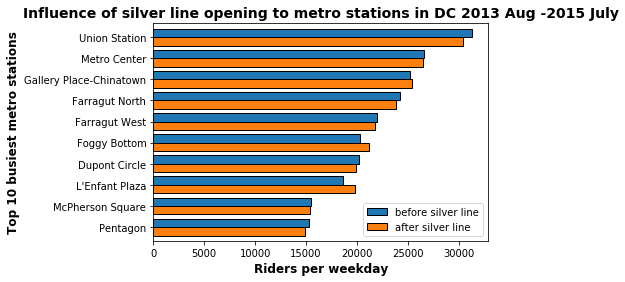

In [4]:
plt.figure()

maxRPW.plot(kind = 'barh', edgecolor = 'black', width = 0.8)
plt.gca().invert_yaxis()
plt.title('Influence of silver line opening to metro stations in DC 2013 Aug -2015 July', 
          fontsize = 14, fontweight='bold')
plt.gca().set_xlabel('Riders per weekday', fontsize = 12, fontweight='bold')
plt.gca().set_ylabel('Top 10 busiest metro stations', fontsize = 12, fontweight='bold')
# plt.gca().grid(True, axis = 0)
plt.gca().set_yticks(np.arange(len(list(maxRPW.index))))
plt.show()

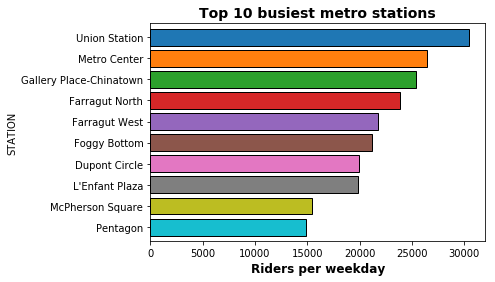

In [5]:
plt.figure()

maxRPW['after silver line'].plot(kind = 'barh', edgecolor = 'black', width = 0.8)
plt.gca().invert_yaxis()
plt.title('Top 10 busiest metro stations', 
          fontsize = 14, fontweight='bold')
plt.gca().set_xlabel('Riders per weekday', fontsize = 12, fontweight='bold')
# plt.gca().set_ylabel('Top 10 busiest metro stations', fontsize = 12, fontweight='bold')
# plt.gca().grid(True, axis = 0)
plt.gca().set_yticks(np.arange(len(list(maxRPW.index))))
plt.show()